In [1]:
import pint
from numpy import *
import pylab as plt
import os
from natural_constants import * 

In [2]:
T0  = u_T0          
Sc  = solar_const   
Sd  = sun_earth_distance
SR  = sun_radius       
TS  = sun_surface_temp 

In [3]:
sun_total_radiated_power = u_σ * TS**4 * 4.0 * np.pi * SR**2
solar_constant = u_σ * TS**4 *  SR**2 / Sd**2 

print('PS    = {:.2e}'.format((sun_total_radiated_power).to('W')))
print('PS/m² = {:.2e}'.format(((u_σ * TS**4)).to('W/m**2')))
print('Sc    = {:.2e}'.format((Sc).to('W/m**2')))
print('Sc2   = {:.2e}'.format((solar_constant).to('W/m**2')))

PS    = 3.85e+26 watt
PS/m² = 6.32e+07 watt / meter ** 2
Sc    = 1.37e+03 watt / meter ** 2
Sc2   = 1.37e+03 watt / meter ** 2


sum(US) * Δλ = 1.37e+03 watt / meter ** 2
sum(UIR)* Δλ = 3.88e+02 watt / meter ** 2


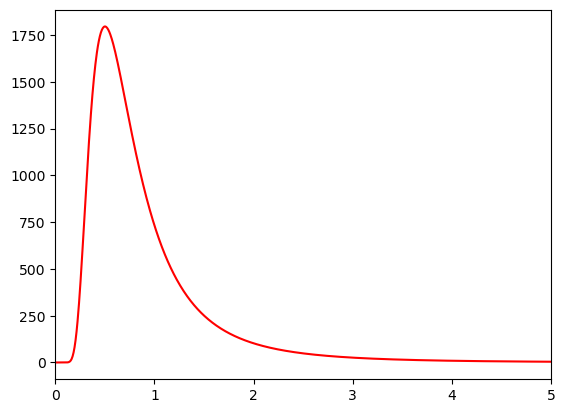

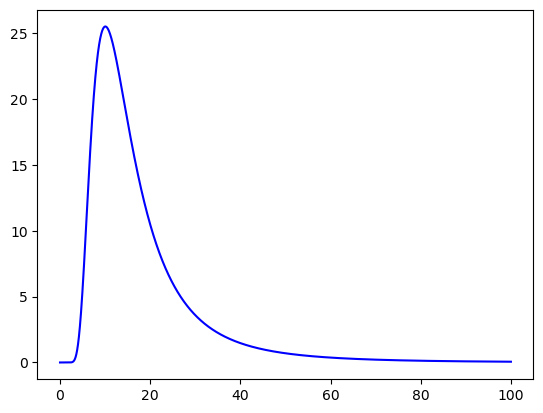

In [4]:
λ   = np.mgrid[1.0e-8:1.0e-4:20000j] * u.m
Δλ  = λ[1] - λ[0]

US  = uPlanckLaw(λ, TS) * SR**2 / Sd**2
UIR = uPlanckLaw(λ, 288.0)
print("sum(US) * Δλ = {:.2e}".format(((np.sum(US) * Δλ).to('W/m**2'))))
print("sum(UIR)* Δλ = {:.2e}".format(((np.sum(UIR) * Δλ).to('W/m**2'))))

λm   = uval(λ)
USm  = uval(US)
UIRm = uval(UIR)

plt.plot(λm*1.0e6, USm*1.0e-6,'r')
plt.axis([0.0, 5.0, None, None])
plt.figure()
plt.plot(λm*1.0e6, UIRm*1.0e-6,'b')

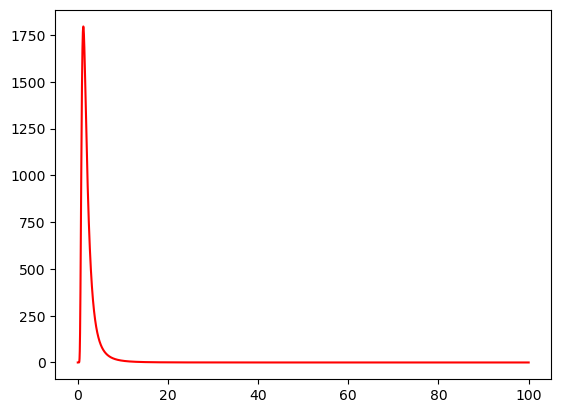

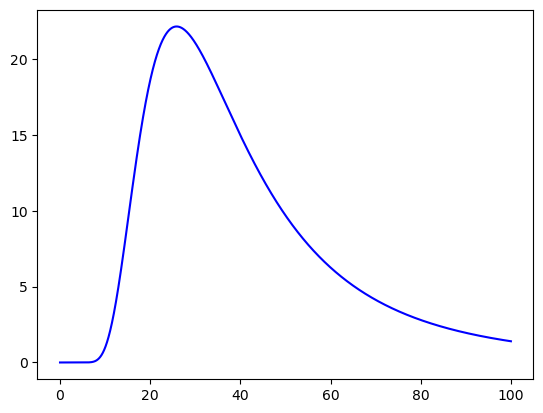

In [10]:
plt.figure()
λ   = np.mgrid[1.0e-8:4.0e-5:20000j] * u.m
US  = uPlanckLaw(λ, TS) * SR**2 / Sd**2
UIR = uPlanckLaw(λ, 280.0)

USm  = uval(US)
UIRm = uval(UIR)

plt.plot(λm*1.0e6, USm*1.0e-6,'r')
plt.figure()
plt.plot(λm*1.0e6, UIRm*1.0e-6,'b')


In [12]:
λ = np.mgrid[13.0e-6:17.0e-6:2000j] * u.m
US = uPlanckLaw(λ, TS) * SR**2 / Sd**2
UIR = uPlanckLaw(λ, 280.0*u.K)

print('sum(US)  Δλ  = {:.3e}'.format((sum(US) * (λ[1] - λ[0])).to('W/m**2')))
print('sum(UIR) Δλ  = {:.3e}'.format((sum(UIR) * (λ[1] - λ[0])).to('W/m**2')))

sum(US)  Δλ  = 2.505e-01 watt / meter ** 2
sum(UIR) Δλ  = 6.637e+01 watt / meter ** 2


<div> <img src="figures/energy_balance_detailed.png" width=400> </div>

## Intensity balance
(1) $(1-u) I_s - I_e + I_l = 0$

(2) $I_s - I_l - (1-v) I_e = 0$

Transform (1):   
$I_l = I_e - (1-u) I_s$

Insert into (2):   
$I_s - (I_e - (1-u) I_s) - (1-v) I_e = 0$


$I_s + (1-u) I_s = I_e + (1-v) I_e$

$(2-u) I_s = (2-v) I_e$

$I_e = I_s \dfrac{2-u}{2-v}$

With (1):   
$I_l = I_s \left(\dfrac{2-u}{2-v} - (1-u)\right)$


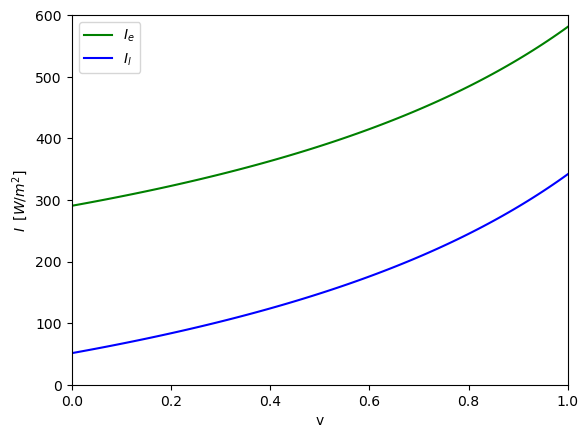

In [13]:
u = 0.3
v = np.mgrid[0.0:1.0:100j]
Is = Sc/4.0
Ie = Is * (2.0-u)/(2.0-v)
Il = Is * ((2.0-u)/(2.0-v) - (1-u))
plt.plot(v, uval(Ie), 'g', label="$I_e$")
plt.plot(v, uval(Il), 'b', label="$I_l$")
plt.xlabel("v")
plt.ylabel("$I\;\; [W/m^2]$")
plt.legend(loc='best')
plt.axis([0.0, 1.0, 0.0, 600.0])
plt.savefig("figures/I_vs_v.png")

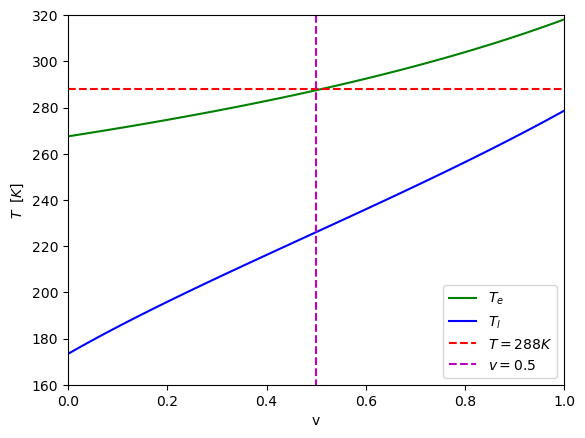

In [14]:
Te = (Ie/u_σ)**(1/4)
Tl = (Il/u_σ)**(1/4)
plt.plot(v, uval(Te), 'g', label="$T_e$")
plt.plot(v, uval(Tl), 'b', label="$T_l$")
plt.plot([0.0,1.0], [288.0, 288.0], 'r--', label="$T = 288 K$")
plt.plot([0.5,0.5], [320.0, 160.0], 'm--', label="$v = 0.5$")
plt.xlabel("v")
plt.ylabel("$T\;\; [K]$")
plt.legend(loc='best')
plt.axis([0.0, 1.0, 160, 320])
plt.savefig("figures/T_vs_v.png")